## Final Project Submission

Please fill out:
* Student name: Kelvin Waters
* Student pace: online-ds-ft-012120
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


### Objective
This project entails utilizing the kc_house_data set to predict housing prices making use of a multivariate linear regression model. The initial dataset consists well over twenty-thousand rows spanding twenty-one columns at approx: 3.5MB. The price is the dependant variable and is the targeted prediction in this notebook, the features are the independent variables. The columns and descriptions in the dataset are as follows:
* id - a notation for a house
* date - date house was sold
* price - price is prediction target
* bedrooms - number of bedrooms/house
* bathrooms - number of bathrooms/house
* sqft_living - square footage of the home
* sqft_loft - square footage of the lot
* floors - total floors (levels) in the house
* waterfront - house which has a view to a waterfront
* view - has been viewed
* condition - how good the condition is overall(1-5 scale, 5 being excellent)
* grade - overall grade given to the housing unit, based on King County grading system
* sqft_above - square footage of the house apart from the basement
* sqft_basement - square footage of the basement
* yr_built - year house was constructed

Exploratory data analysis (EDA) questions addressed in this notebook are as follows:
1. *What independant variables are being considered categorical and why?*
2. *How and which dtypes values are being prepped for modeling?*
3. *Which, if any, independant variables were considered highly correlated and how was it handled?*

> This notebook will be following the **OSEMIN** processing model and is documented accordingly

<img src="images/new_osemn.png" width=600>

Coefficient findings and answers
1. *Coefficient Y of the model...*
2. *Coefficient B1 ...*
3. *Coefficient  e ...*

In [2]:
import numpy as np
import pandas as pd 

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import calendar

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as sm
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

### Obtain
Initial loading of the data set

In [3]:
# importing the data set 
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Taking note of the original shape of the data set

In [4]:
data.shape

(21597, 21)

Basic info of the columns and data types

### Scrub & Clean

In [5]:
# taking note of the various data types
# object types date, yr_renovated may be changed to date_time dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Simple glance and values of each column

In [6]:
# viewing each column as a str object 
for col in data.columns:
    try:
        print(col, data[col].value_counts()[:5])
    except:
        print(col, data[col].value_counts())
        
    print('\n') 

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

Descriptive statistics for the dataset. 

In [7]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Checking correlation of the data set

In [8]:
# correlation of the features
# questioning if any of these features are dependent on another feature
independant_variables = ['bedrooms', 'bathrooms', 'sqft_living', 
                         'sqft_lot', 'floors', 'waterfront', 'view', 
                         'condition', 'grade', 'sqft_above', 'sqft_basement',
                        'yr_built']
data[independant_variables].corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193
waterfront,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079
view,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.087383,0.249727,-0.146896,1.000000,0.756073,0.447865
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.075463,0.166299,-0.158904,0.756073,1.000000,0.424037


Checking for multicollinearity via masked heatmap

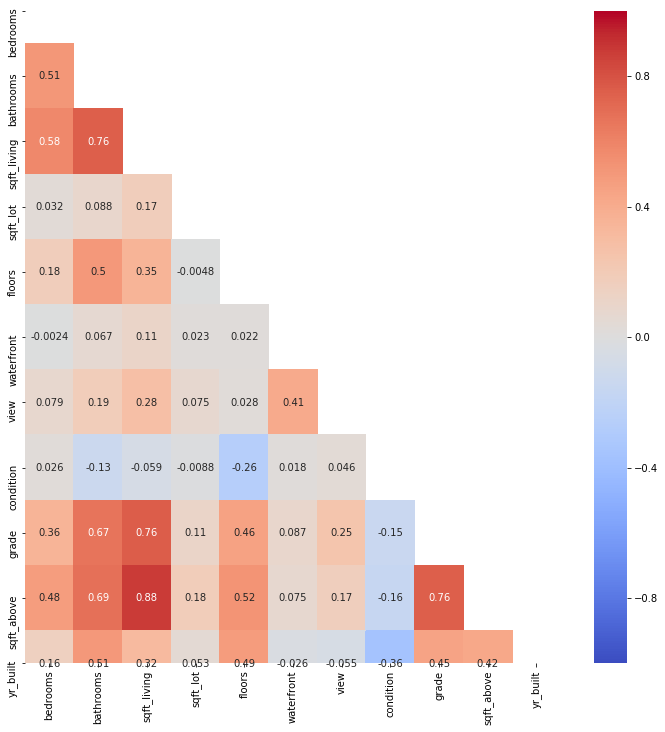

In [9]:
# correlation map without the duplicated data via mask
# look good the sqft_above indicates a correlation with an indentical metric
# sqft_living, which measures the living area above the grade/basement. 

"""multicollinearity is a relationship between 3 or more variables while correlation
simply investigates the relationship between two variables."""

corr = data[independant_variables].corr()

mask = np.zeros_like(corr, dtype= np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,12))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True, mask = mask);

Converting calendar events to_datetime object

In [10]:
# date, yr_renovated, yr_built
data['date'] = pd.to_datetime(data['date'])
data['yr_renovated'] = pd.to_datetime(data['yr_renovated'])
data['yr_built'] = pd.to_datetime(data['yr_built'])

In [11]:
# sqft_basement to categorical yes -1 , no - 0
# having a 'finished' basement will influence the target model price
# this data set doesn't differiate if the basement is considered a finished basement, like a home movie theatre/ gameroom
# the majority (> 12k) of values is listed as 0.0, assuming no basement another 454 values have '?'
data['sqft_basement'] = data['sqft_basement'].replace('?', '0')
data['sqft_basement'] = data['sqft_basement'].astype(float)

Normalizing data (scaling values)

|-----------------------||OLS Regression Results normalized features||-----------------                   
|:----------------------||:---------------------:||----------------:|
|Dep. Variable           |price                  |R-Squared:        |0.806
|Model:                  |OLS                    |Adj. R-Squared    |0.805
|Method:                 |Least Squares          |F-stastic:        |990.7
|Date:                   |Monday                 |Prob (F-statistic)|0.00
|Time:                   |12:23:53               |Log-Likelihood:   |-2.5723e+05
|No. Observation         |19164                  |AIC:              |5.146e+05
|Df Residuals:           |19083                  |BIC:              |5.153e+05
|Df Model:               |80                  
|Covariance Type:        |nonrobust                

In [12]:
# def normalize_features(columns):
#     return (columns - columns.mean()) / columns.std()
# for features in ['bedrooms', 'bathrooms', 'sqft_living', 
#                          'sqft_lot', 'floors', 'waterfront', 'view', 
#                          'condition', 'grade', 'sqft_above', 'sqft_basement']:
#     data[features] = normalize_features(data[features])
    
# data.describe()    

Saving cleaned dataset as csv file. Date_time objects ommited and sqft_basement values '?' changed to 0

In [13]:
# not sure what impact this will have on the model since I plan to have view, sqft_basement, 
# waterfront as binary yes or no values
data.to_csv('data_dataset_cleaned.csv', index=False)

**This cell will be commented out and results compared to the normalized cell above.**

|-----------------------||OLS Regression Results||-----------------                   
|:----------------------||:---------------------:||----------------:|
|Dep. Variable           |price                  |R-Squared:        |0.899
|Model:                  |OLS                    |Adj. R-Squared    |0.899
|Method:                 |Least Squares          |F-stastic:        |2123.
|Date:                   |Monday                 |Prob (F-statistic)|0.00
|Time:                   |12:23:53               |Log-Likelihood:   |-2.5098e+05
|No. Observation         |19164                  |AIC:              |5.021e+05
|Df Residuals:           |19083                  |BIC:              |5.028e+05
|Df Model:               |80                  
|Covariance Type:        |nonrobust                

Changing view, waterfront, sqft_basement to "has features". Any value > 0 is changed to a 1. So this can be viewed as a has view? Has basement? Is waterfront? 

In [14]:
# views to binary
data.view.values[data['view'].values > 0] = 1
# sqft_basement to binary
data.sqft_basement.values[data['sqft_basement'].values > 0] = 1
# waterfront to binary
data.waterfront.values[data['waterfront'].values > 0] = 1

In [15]:
data.view.value_counts()

0.0    19422
1.0     2112
Name: view, dtype: int64

In [16]:
data.sqft_basement.value_counts()

0.0    13280
1.0     8317
Name: sqft_basement, dtype: int64

In [17]:
data.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

Checking for missing values

In [18]:
# waterfront has 11% missing, this is dealt with as changing to a binary value yes 1 or no 0. 
# view < 1%
# yr_renovated 18% missing values
data.isna().mean().round(4)* 100

id                0.00
date              0.00
price             0.00
bedrooms          0.00
bathrooms         0.00
sqft_living       0.00
sqft_lot          0.00
floors            0.00
waterfront       11.00
view              0.29
condition         0.00
grade             0.00
sqft_above        0.00
sqft_basement     0.00
yr_built          0.00
yr_renovated     17.79
zipcode           0.00
lat               0.00
long              0.00
sqft_living15     0.00
sqft_lot15        0.00
dtype: float64

Consequences of dropna()

In [19]:
# dropping NaN's axis= 1 col would remove to columns
# dropping NaN's axis= 0 rows would lose more than half of the dataframe! 
drop_nans = data.dropna(axis= 0)
display(data.shape) # original shape
drop_nans.shape # dropna utilized shape

(21597, 21)

(15762, 21)

> Below grade spaces (basements, dens, etc.) do not usually count toward a home's square footage. 
> Even a finished basement can't be counted toward a home's Gross Living Area (GLA) but it can be noted 
> separately in the listings total area. ... Stairways and closet areas are included in the square footage length.

<img src="images/redfin.png">
%%html
<a href="https://www.redfin.com/blog/how-to-calculate-the-square-footage-of-your-home/">How to calculate the sqft of your home</a>

In [51]:
# adding a price_per_sqft column
# popular real estate metric which I can utilize in presentation
data['price_per_sqft'] = data['price'] / data['sqft_living']
data.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1970-01-01 00:00:00.000001955,1970-01-01 00:00:00.000000000,98178,47.5112,-122.257,1340,5650,188.050847
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,1.0,1970-01-01 00:00:00.000001951,1970-01-01 00:00:00.000001991,98125,47.7210,-122.319,1690,7639,209.338521


|-----------------------||OLS Regression Results without price_per_sqft||-----------------                   
|:----------------------||:---------------------:||----------------:|
|Dep. Variable           |price                  |R-Squared:        |0.803
|Model:                  |OLS                    |Adj. R-Squared    |0.802
|Method:                 |Least Squares          |F-stastic:        |986.5
|Date:                   |Monday                 |Prob (F-statistic)|0.00
|Time:                   |12:23:53               |Log-Likelihood:   |-2.5736e+05
|No. Observation         |19164                  |AIC:              |5.149e+05
|Df Residuals:           |19083                  |BIC:              |5.155e+05
|Df Model:               |79                  
|Covariance Type:        |nonrobust                

Striping space from data.columns

In [52]:
data.columns = data.columns.str.strip()

Dropping columns that I'm assuming has little to no affect on target variable price

In [53]:
# how many times a property was viewed would'nt affect target
# the lat and long of a dwelling wouldn't affect the target, properties in prominent zipcodes are often sought
# sqft_living15 and sqft_lot15 wouldn't affect target
# sqft_above are indentical values to sqft_living the "above grade living area"
# excluding date for the time being from model consideration
data_scrub = data.drop(['id', 'lat', 'long', 'date', 'sqft_above', 'sqft_living15', 'sqft_lot15'], axis= 'columns')
data_scrub.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,price_per_sqft
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,0.0,1970-01-01 00:00:00.000001955,1970-01-01 00:00:00.000000000,98178,188.050847
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1.0,1970-01-01 00:00:00.000001951,1970-01-01 00:00:00.000001991,98125,209.338521
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,0.0,1970-01-01 00:00:00.000001933,NaT,98028,233.766234
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1.0,1970-01-01 00:00:00.000001965,1970-01-01 00:00:00.000000000,98136,308.163265
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,0.0,1970-01-01 00:00:00.000001987,1970-01-01 00:00:00.000000000,98074,303.571429


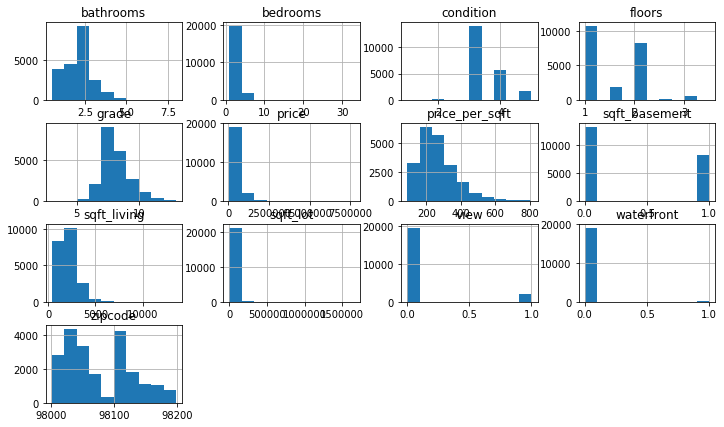

<Figure size 1080x1080 with 0 Axes>

In [54]:
data_scrub.hist()
plt.figure(figsize=(15,15))
plt.show()

In [55]:
data_scrub.price_per_sqft.describe()

count    21597.000000
mean       264.143368
std        110.000061
min         87.588235
25%        182.291667
50%        244.644550
75%        318.333333
max        810.138889
Name: price_per_sqft, dtype: float64

Data being transfered via one-hot encoding to cat data

In [56]:
# 33 bedrooms! 
data_scrub.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [57]:
# potential outliars 33 bedrooms and 1.75 baths in a 1620sqft living space sounds implausible
data_scrub[data_scrub.bedrooms > 9]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,price_per_sqft
8748,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3,7,1.0,1970-01-01 00:00:00.000001918,1970-01-01 00:00:00.000001999,98106,173.333333
13301,1150000.0,10,5.25,4590,10920,1.0,0.0,1.0,3,9,1.0,1970-01-01 00:00:00.000002008,1970-01-01 00:00:00.000000000,98004,250.544662
15147,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,4,7,1.0,1970-01-01 00:00:00.000001958,1970-01-01 00:00:00.000000000,98006,180.055402
15856,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1.0,1970-01-01 00:00:00.000001947,1970-01-01 00:00:00.000000000,98103,395.061728
19239,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4,7,1.0,1970-01-01 00:00:00.000001913,1970-01-01 00:00:00.000000000,98105,226.027397


In [58]:
# changed value of 15856 from 33 bedrooms to 3 assuming input error! 
# And removing an outlier. 
data_scrub.at[15856,'bedrooms'] = 3

In [59]:
data_scrub.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'price_per_sqft'],
      dtype='object')

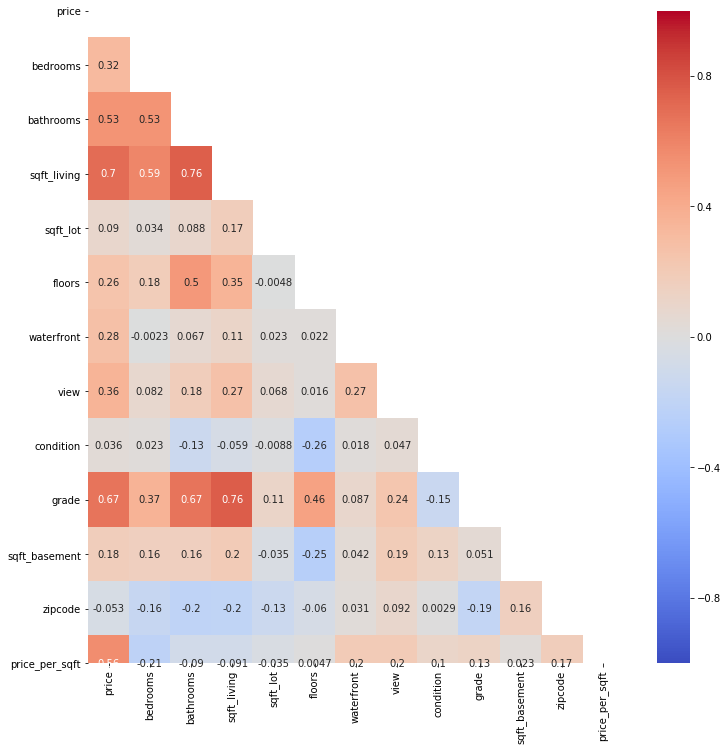

In [60]:
corr = data_scrub.corr()

mask = np.zeros_like(corr, dtype= np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,12))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True, mask = mask);

### Explore

Concern that outliers could exist here, like a 2BR price comparision of a larger 3BR for the same general area, although this would not be unheard of. 

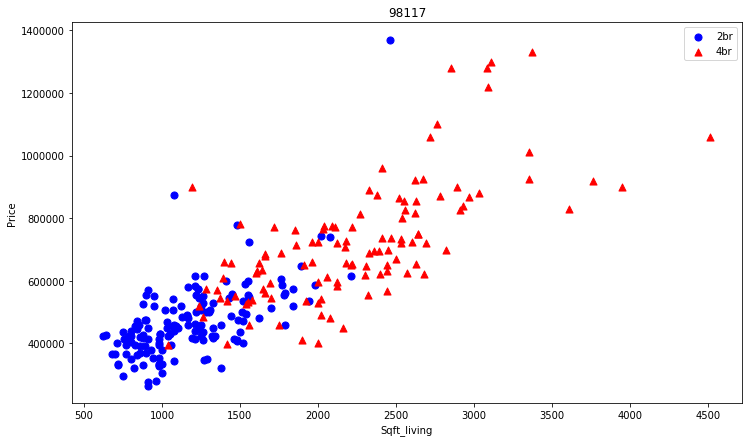

In [61]:
# comparing price between home size 
# some outliers indicate that some 2br dwellings are more expensive than 5br's in the same zipcode and sqft. 

def scatter(df, zipcode):
    bed_a = data_scrub[(data.zipcode == zipcode) & (data.bedrooms == 2)] 
    bed_b = data_scrub[(data.zipcode == zipcode) & (data.bedrooms == 4)]
    
    plt.rcParams['figure.figsize'] = (12,7)
    plt.scatter(bed_a.sqft_living, bed_a.price, color = 'b', label = '2br', s= 50)
    plt.scatter(bed_b.sqft_living, bed_b.price, marker= '^', color = 'r', label = '4br', s= 50)

    plt.xlabel('Sqft_living')
    plt.ylabel('Price')
    plt.title(zipcode)
    plt.legend()

scatter(data, 98117)

In [62]:
# property count by zip codes
zipcode_stats = data.groupby('zipcode')['zipcode'].agg('count').sort_values(ascending= False)
zipcode_stats

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Text(0, 0.5, 'count')

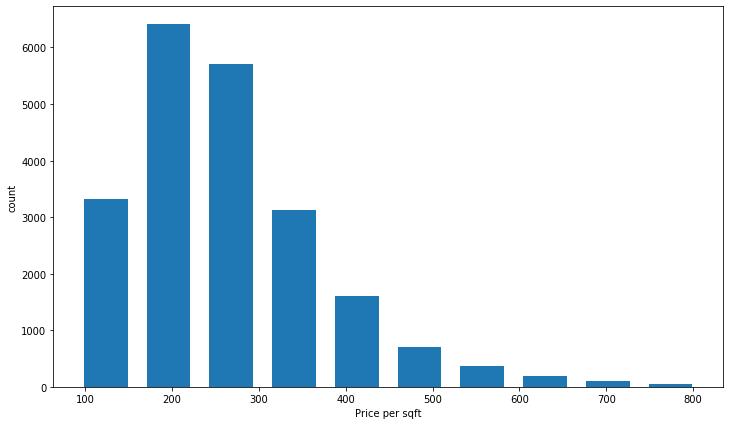

In [63]:
plt.figure(figsize=(12,7))
plt.hist(data.price_per_sqft, rwidth=0.7)
plt.xlabel('Price per sqft')
plt.ylabel('count')

Changing zipcode to categorical type as a location

In [64]:
# assigning these value into a dataframe obj
# all 70 values are now columns
dummies = pd.get_dummies(data_scrub.zipcode)

In [65]:
# on axis = 1 columns
# minus 1 dummy 98199
model_concat_dummies  = pd.concat([data_scrub, dummies.drop(98199, axis= 1)], axis= 1)

In [66]:
model_concat_dummies.columns

Index([         'price',       'bedrooms',      'bathrooms',    'sqft_living',
             'sqft_lot',         'floors',     'waterfront',           'view',
            'condition',          'grade',  'sqft_basement',       'yr_built',
         'yr_renovated',        'zipcode', 'price_per_sqft',            98001,
                  98002,            98003,            98004,            98005,
                  98006,            98007,            98008,            98010,
                  98011,            98014,            98019,            98022,
                  98023,            98024,            98027,            98028,
                  98029,            98030,            98031,            98032,
                  98033,            98034,            98038,            98039,
                  98040,            98042,            98045,            98052,
                  98053,            98055,            98056,            98058,
                  98059,            98065,          

In [67]:
# ok now that zipcode has been change via get_dummies we can drop the feature as well as the 
# price_per_sqft that was used to chase outliers
model_concat_dummies_drop = model_concat_dummies.drop('zipcode', axis= 1)

In [68]:
model_concat_dummies_drop.columns

Index([         'price',       'bedrooms',      'bathrooms',    'sqft_living',
             'sqft_lot',         'floors',     'waterfront',           'view',
            'condition',          'grade',  'sqft_basement',       'yr_built',
         'yr_renovated', 'price_per_sqft',            98001,            98002,
                  98003,            98004,            98005,            98006,
                  98007,            98008,            98010,            98011,
                  98014,            98019,            98022,            98023,
                  98024,            98027,            98028,            98029,
                  98030,            98031,            98032,            98033,
                  98034,            98038,            98039,            98040,
                  98042,            98045,            98052,            98053,
                  98055,            98056,            98058,            98059,
                  98065,            98070,          

In [69]:
# zipcode as a location seems feasible as a dummy categorical variable
# has view 
# has basement (this size is never calculated in target price)
# yr_renovated may be better a better model metric is the property has a yes or no renovated answer since calendar isn't
# being considered for modeling in this first iteration

data_dummies = pd.get_dummies(data_scrub, columns= ['zipcode'])
data_dummies.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,0,0,0,0,0,0,0,0,0,0


### Model

In [79]:
# Define the problem
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
        'price_per_sqft', 'zipcode_98001', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199']

In [80]:
# preprocessing 
# date_time errors, every col with dtype date_time removed
data_dummies.columns = [col.replace(' ', '_') for col in data_dummies.columns]
for col in x_cols:
    data_dummies[col] = (data_dummies[col] - data_dummies[col].mean()) / data_dummies[col].std()
    
data_dummies.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,-0.411251,-1.451039,-0.980629,-0.228177,-0.915531,NaN,-0.329754,-0.629972,-0.560787,...,-0.116253,-0.05144,-0.145208,-0.109089,-0.112303,-0.109306,9.023720,-0.079604,-0.114606,-0.122049
1,538000.0,-0.411251,0.174482,0.533357,-0.189735,0.937409,-0.087485,-0.329754,-0.629972,-0.560787,...,-0.116253,-0.05144,-0.145208,-0.109089,-0.112303,-0.109306,-0.110814,-0.079604,-0.114606,-0.122049
2,180000.0,-1.517328,-1.451039,-1.427201,-0.123137,-0.915531,-0.087485,-0.329754,-0.629972,-1.413157,...,-0.116253,-0.05144,-0.145208,-0.109089,-0.112303,-0.109306,-0.110814,-0.079604,-0.114606,-0.122049
3,604000.0,0.694825,1.149794,-0.131054,-0.243873,-0.915531,-0.087485,-0.329754,2.444371,-0.560787,...,-0.116253,-0.05144,-0.145208,-0.109089,-0.112303,-0.109306,-0.110814,-0.079604,-0.114606,-0.122049
4,510000.0,-0.411251,-0.150622,-0.436030,-0.169499,-0.915531,-0.087485,-0.329754,-0.629972,0.291583,...,-0.116253,-0.05144,-0.145208,-0.109089,-0.112303,-0.109306,-0.110814,-0.079604,-0.114606,-0.122049


Fitting the actual model

In [81]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data_dummies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     2124.
Date:                Sat, 21 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:30:06   Log-Likelihood:            -2.5098e+05
No. Observations:               19164   AIC:                         5.021e+05
Df Residuals:                   19083   BIC:                         5.028e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.404e+05    853.364    633.309      0.000    5.39e+05    5.42e+05
bedrooms       -4300.6193   1142.107     -3.766      0.000   -6539.251   -2061.988
bathrooms       1.058e+04   1504.030      7.035      0.000    7633.086    1.35e+04
sqft_living     2.525e+05   1854.178    136.184      0.000    2.49e+05    2.56e+05
sqft_lot       -5988.4482    964.040     -6.212      0.000   -7878.051   -4098.845
floors         -4502.0461   1216.646     -3.700      0.000   -6886.779   -2117.313
waterfront      2.856e+04    949.448     30.079      0.000    2.67e+04    3.04e+04
view            7163.8658    995.234      7.198      0.000    5213.120    9114.612
condition       6672.7715    925.366      7.211      0.000    4858.972    8486.571
grade            1.94e+04   1562.228     12.416      0.000    1.63e+04    2.25e+04
sqft_basement    777.4539   1077.923      0.721      0.471   -1335.371    2890.279
price_per_sqft  2.087e+05   1551.504    134.496      0.000    2.06e+05    2.12e+05
zipcode_98001   2022.3683    858.460      2.356      0.018     339.710    3705.026
zipcode_98002   4831.0962    859.469      5.621      0.000    3146.462    6515.730
zipcode_98003    619.3368    852.685      0.726      0.468   -1052.001    2290.674
zipcode_98004   2.064e+04    931.880     22.147      0.000    1.88e+04    2.25e+04
zipcode_98005   -134.1213    832.734     -0.161      0.872   -1766.354    1498.111
zipcode_98006    266.1061    863.016      0.308      0.758   -1425.482    1957.694
zipcode_98007   -282.1649    865.016     -0.326      0.744   -1977.672    1413.342
zipcode_98008    620.4560    841.048      0.738      0.461   -1028.073    2268.985
zipcode_98010  -1235.7661    863.439     -1.431      0.152   -2928.183     456.651
zipcode_98011  -2060.0493    844.939     -2.438      0.015   -3716.205    -403.894
zipcode_98014     76.8842    867.262      0.089      0.929   -1623.027    1776.795
zipcode_98019  -1361.2170    857.559     -1.587      0.112   -3042.109     319.675
zipcode_98022   1334.0850    873.930      1.527      0.127    -378.894    3047.064
zipcode_98023  -1205.0913    870.929     -1.384      0.166   -2912.189     502.006
zipcode_98024    -62.5585    852.113     -0.073      0.941   -1732.774    1607.657
zipcode_98027  -3407.3841    837.539     -4.068      0.000   -5049.035   -1765.733
zipcode_98028  -1216.0429    839.716     -1.448      0.148   -2861.961     429.875
zipcode_98029   -867.2363    838.379     -1.034      0.301   -2510.534     776.061
zipcode_98030    485.3426    846.061      0.574      0.566   -1173.012    2143.697
zipcode_98031    704.5978    855.662      0.823      0.410    -972.576    2381.771
zipcode_98032   2085.9138    846.926      2.463      0.014     425.865    3745.963
zipcode_98033   2611.2255    861.592      3.031      0.002     922.430    4300.021
zipcode_9803

Printable OLS Summary

In [78]:
# save OLS results as txt file
with open('summary.txt', 'w') as fh:
    fh.write(model.summary().as_text())

In [43]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "height", fig=fig)
plt.show()

ValueError: 'height' is not in list

<Figure size 1080x576 with 0 Axes>

In [ ]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Consequenses of ignoring NaN's 
MissingDataError: exog contains inf or nans

In [44]:
# X = data_dummies[x_cols]
# vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# list(zip(x_cols, vif))

In [45]:
# building model 
model_concat_dummies_drop.shape

(21597, 83)

In [46]:
# target price removed from data for training 
X = model_concat_dummies_drop.drop('price', axis= 1)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,...,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198
0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,0.0,...,0,0,0,0,0,0,0,1,0,0
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0.0,0.0,3,6,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1.0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,0.0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# dependent variable our target price!
y = model_concat_dummies_drop.price 
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 10)

In [49]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

TypeError: invalid type promotion

### Interpret